# Setup

In [11]:
# Import necessary libraries
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Get MNIST Dataset

In [2]:
# Load MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

# Convert target to integers (it may come as string)
y = y.astype(np.uint8)

In [3]:
y.shape

(70000,)

In [4]:
X.shape

(70000, 784)

# Split Data

In [5]:

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=42)

# KNN Classifier

In [6]:
knn_clf = KNeighborsClassifier()

# Train a KNN Classifier on the MNIST Dataset
knn_clf.fit(X_train, y_train)

# Predict output
y_knn_pred = knn_clf.predict(X_test)

print('Accuracy_score with default hyperparameters: n_neighbors= 5, weights= uniform:')
accuracy_score(y_test, y_knn_pred)

Accuracy_score with default hyperparameters: n_neighbors= 5, weights= uniform:


0.9692888480767269

# KNN Classifier Hyperparameters Fine-Tuning

In [ ]:
# Perform a grid search to find the best hyperparameters
param_grid = {
    'n_neighbors': [3, 4, 5],
    'weights': ['uniform', 'distance']
}

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

print("\n Best parameters found by grid search:", grid_search.best_params_)
print("\n Best cross-validation accuracy:", grid_search.best_score_)

print('\n Best knn_clf =', grid_search.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  39.1s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  38.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  39.2s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  39.3s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  39.8s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.973 total time=  38.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  38.8s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.973 total time=  37.2s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  38.9s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  39.1s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  40.8s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

 # Model Performance on the test set

In [7]:
# Train the classifier with the best parameters
best_knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
best_knn_clf.fit(X_train, y_train)

# Evaluate the classifier accuracy on the test set
y_test_pred = best_knn_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))

Test set accuracy: 0.9730639730639731
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       967
           1       0.96      1.00      0.98      1129
           2       0.98      0.97      0.97       950
           3       0.97      0.97      0.97      1018
           4       0.98      0.96      0.97       885
           5       0.97      0.97      0.97       914
           6       0.98      0.99      0.98       946
           7       0.96      0.97      0.97      1031
           8       0.99      0.94      0.96       950
           9       0.96      0.96      0.96      1011

    accuracy                           0.97      9801
   macro avg       0.97      0.97      0.97      9801
weighted avg       0.97      0.97      0.97      9801



Error Analysis


In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_test_pred))

,0,1,2,3,4,5,6,7,8,9
0,962,0,2,0,0,0,1,1,1,0
1,0,1124,1,0,1,0,0,2,0,1
2,4,9,920,1,1,0,2,8,4,1
3,0,1,9,984,0,7,1,6,4,6
4,2,6,1,0,852,0,2,3,1,18
5,0,2,0,10,2,890,8,0,1,1
6,4,0,0,0,4,4,933,0,1,0
7,0,14,3,0,3,0,0,1005,0,6
8,1,8,2,13,1,12,4,8,892,9
9,4,3,0,8,8,0,0,13,0,975


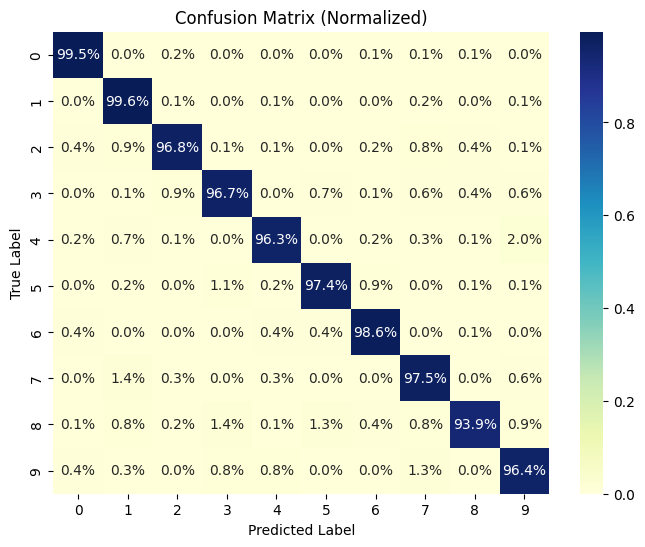

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Sample true and predicted labels
y_true = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # True labels
y_pred = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Predicted labels

# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Normalize the confusion matrix by rows (true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".1%", cmap="YlGnBu", cbar=True)

plt.title("Confusion Matrix (Normalized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Compare the accuracy of your KNN classifier with other classifiers

# Random Forest Classifier



In [12]:
# Define the parameter grid for fine-tuning Random Forest hyperparameters
param_grid = {
    # Number of trees in the forest
    'n_estimators': [400, 500],
    # The number of features to consider when looking for the best split
    'max_depth': [30, None],  # Maximum depth of the trees
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("\n Best parameters found by grid search:", grid_search.best_params_)
print("\n Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



 Best parameters found by grid search: {'max_depth': None, 'n_estimators': 500}

 Best cross-validation accuracy: 0.9695343635399791


In [13]:
# Train the classifier with the best parameters
best_model = RandomForestClassifier(max_depth=None, n_estimators= 500)
best_model.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\n Test set accuracy:", test_accuracy)
# classification_report
print(classification_report(y_test, y_test_pred))



 Test set accuracy: 0.9689827568615448
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       967
           1       0.98      0.99      0.99      1129
           2       0.95      0.98      0.96       950
           3       0.96      0.95      0.96      1018
           4       0.97      0.97      0.97       885
           5       0.98      0.96      0.97       914
           6       0.98      0.98      0.98       946
           7       0.97      0.97      0.97      1031
           8       0.95      0.95      0.95       950
           9       0.96      0.95      0.96      1011

    accuracy                           0.97      9801
   macro avg       0.97      0.97      0.97      9801
weighted avg       0.97      0.97      0.97      9801



Error Analysis


In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_test_pred))

,0,1,2,3,4,5,6,7,8,9
0,954,0,4,0,1,0,2,1,5,0
1,0,1114,4,5,1,0,0,3,2,0
2,1,2,925,2,4,0,4,4,7,1
3,1,0,17,968,0,6,2,8,8,8
4,1,0,2,0,857,0,5,2,2,16
5,1,1,0,15,3,878,6,0,8,2
6,5,1,0,0,3,7,929,0,1,0
7,1,3,13,0,5,0,0,1000,2,7
8,0,4,5,11,4,4,3,4,909,6
9,4,5,1,13,14,2,1,7,7,957


# SGD Classifier

In [14]:
# Define the parameter grid for fine-tuning alpha and learning rate
param_grid = {
    'alpha': [1e-3, 1e-2], # Regularization strength
    'learning_rate': ['optimal', 'adaptive'], # Different learning rate strategies
    'eta0': [0.1],
  }

sgd_clf = SGDClassifier(random_state=42)
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best hyperparameters: ", grid_search.best_params_)
print("\n Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best hyperparameters:  {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'optimal'}

 Best cross-validation accuracy: 0.8783698163692252


In [15]:
# Train the classifier with the best parameters
best_sgd_clf = SGDClassifier(alpha=0.01, learning_rate= 'optimal')
best_sgd_clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_test_pred = best_sgd_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)
# classification_report
print(classification_report(y_test, y_test_pred))

Test set accuracy: 0.8941944699520457
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       967
           1       0.96      0.97      0.96      1129
           2       0.89      0.90      0.89       950
           3       0.90      0.85      0.87      1018
           4       0.97      0.75      0.85       885
           5       0.85      0.85      0.85       914
           6       0.96      0.90      0.93       946
           7       0.90      0.94      0.92      1031
           8       0.80      0.87      0.83       950
           9       0.81      0.91      0.86      1011

    accuracy                           0.89      9801
   macro avg       0.90      0.89      0.89      9801
weighted avg       0.90      0.89      0.89      9801



Error Analysis


In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_test_pred))

,0,1,2,3,4,5,6,7,8,9
0,900,0,6,0,3,9,16,2,26,5
1,0,1065,5,5,0,8,2,2,37,5
2,2,5,815,5,13,13,26,3,64,4
3,0,4,36,842,1,42,5,6,50,32
4,0,1,8,1,803,8,8,1,18,37
5,6,5,3,32,15,758,22,2,57,14
6,2,2,4,1,3,30,893,0,11,0
7,4,0,16,2,18,4,0,892,18,77
8,4,7,3,13,5,28,10,3,835,42
9,2,2,2,5,24,4,0,15,20,937


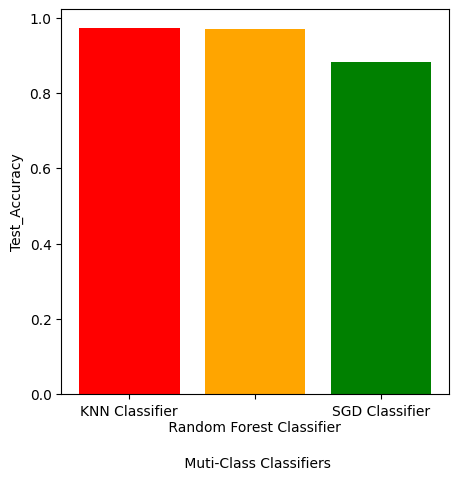

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN Classifier', '\n Random Forest Classifier ', 'SGD Classifier']
Test_Accuracy = [0.9730639730639731, 0.9690847872666054, 0.882563003775125]
colors = ['red', 'orange', 'green', 'blue' ]

plt.figure(figsize=(5, 5))
plt.bar(models, Test_Accuracy, color=colors)

plt.ylabel('Test_Accuracy')
plt.xlabel('\n Muti-Class Classifiers')
plt.title('')
plt.show()